# Problem Statement

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

# Data Dictionary:

* ‘Unnamed 0’- Index of the dataset
* Email_hash- Anonymised Personal Identifiable Information (PII)
* Company- Current employer of the learner
* orgyear- Employment start date
* CTC- Current CTC
* Job_position- Job profile in the company
* CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

# Concept Used:

* Manual Clustering
* Unsupervised Clustering - K- means, Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from tqdm.notebook import tqdm_notebook
import warnings                       
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('scaler_clustering.csv')
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.00,2000000,Backend Engineer,2020.00
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.00,700000,Backend Engineer,2019.00
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.00,1400000,FullStack Engineer,2019.00


<font color = 'Red'> <b> Exploratory Data Analysis </b> </font>

In [3]:
data.shape

(205843, 7)

<font color = 'blue'> <b> Insights </b> </font>
* From the shape of the data we can see that there are 205843 rows and 7 columns. So we can say that we are working with good amount of data.
* Also the column **Unnamed: 0** is of no use so we can drop it as it just stores the index of the data

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace = True)
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.00,2000000,Backend Engineer,2020.00
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.00,700000,Backend Engineer,2019.00
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.00,1400000,FullStack Engineer,2019.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [6]:
data.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

<font color = 'blue'> <b> Insights </b> </font>
* From the above cell we can clearly see that there are null values present in the data
* According to the number of null values job_position lies at the first place followed by orgyear at second and company_hash at third position
* Some of the columns are of categorical datatypes namely **company_hash, email hash and job_position** where are others are of numerical datatypes namely **orgyear, ctc, ctc_updated_year**

In [7]:
i=1
for col in data.columns:
    if data[col].dtypes == 'object':
        print(str(i) + '. "' + col + '" is categorical column with total unique values as: '+ str(len(data[col].unique())))
    else:
        print(str(i) + '. "' + col + '" is continuous column with min, max and mean values as: ', data[col].min(), data[col].max(), data[col].mean())
    i += 1

1. "company_hash" is categorical column with total unique values as: 37300
2. "email_hash" is categorical column with total unique values as: 153443
3. "orgyear" is continuous column with min, max and mean values as:  0.0 20165.0 2014.8827500400957
4. "ctc" is continuous column with min, max and mean values as:  2 1000150000 2271685.0419931696
5. "job_position" is categorical column with total unique values as: 1018
6. "ctc_updated_year" is continuous column with min, max and mean values as:  2015.0 2021.0 2019.6282312247683


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.00,2014.88,63.57,0.00,2013.00,2016.00,2018.00,20165.00
ctc,205843.00,2271685.04,11800914.44,2.00,530000.00,950000.00,1700000.00,1000150000.00
ctc_updated_year,205843.00,2019.63,1.33,2015.00,2019.00,2020.00,2021.00,2021.00


<font color = 'blue'> <b> Insights </b> </font>
* It is clearly stated that the max value in the **orgyear** is 20165 which is wrong since current year is 2022. Hence we will remove all the data that more than 2022 to make the data logically correct.
* It is also clear that the **orgyear** has the min value as 0 also the from the dataset we can see that **orgyear** has values like 1,2,3...., So we will remove the values that are less than 1970 to make the data logical.

In [9]:
data = data[data['orgyear'] <= 2022] 
data =data[data['orgyear'] >= 1970]

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205375.00,2015.10,4.23,1970.00,2013.00,2016.00,2018.00,2022.00
ctc,205375.00,2256871.18,11721432.02,2.00,530000.00,950000.00,1700000.00,1000150000.00
ctc_updated_year,205375.00,2019.63,1.33,2015.00,2019.00,2020.00,2021.00,2021.00


<font color = 'Red'> <b> Feature Engineering </b> </font>

In [11]:
data.isna().sum()*100/data.shape[0]

company_hash        0.02
email_hash          0.00
orgyear             0.00
ctc                 0.00
job_position       25.53
ctc_updated_year    0.00
dtype: float64

<font color = 'blue'> <b> Insights </b> </font>
* From the above table we can say that **company_hash** and **job_position** holds 25.53% of the null value because most of the students wants to keep their job title as private

Filling the null values in **company_hash**

In [12]:
print("Before filling the null the values from the dataset",data['company_hash'].isna().sum())

Before filling the null the values from the dataset 44


In [13]:
_nullEntries = data[data['company_hash'].isna()]

for row in range(_nullEntries.shape[0]):
    _index = _nullEntries.index[row]
    _notNullEntries = data[data['email_hash'] == _nullEntries['email_hash'].iloc[row]]['company_hash'].values.tolist()
    _notNullEntries = [x for x in _notNullEntries if str(x) != 'nan']
    
    if len(_notNullEntries):
        data['company_hash'].loc[_index] = str(_notNullEntries[0])

In [14]:
print("After filling the null the values from the dataset",data['company_hash'].isna().sum())

After filling the null the values from the dataset 37


<font color = 'blue'> <b> Insights </b> </font>
* From the above cell we can clearly see that we have reduced the null values from 44 to 37
* Now for the 37 students we dont see any scope to eliminate these values as we dont have any data to update the null values present in the data

In [15]:
data = data[~data['company_hash'].isna()]

Filling the null values in **job_position**

In [16]:
print(f"Before applying below method number of Null values: ", data['job_position'].isna().sum())

Before applying below method number of Null values:  52400


In [17]:
_nullEntries = data[data['job_position'].isna()]

for row in tqdm_notebook(range(_nullEntries.shape[0])):
    _index = _nullEntries.index[row]
    _notNullEntries = data[data['email_hash'] == _nullEntries['email_hash'].iloc[row]]['job_position'].values.tolist()
    _notNullEntries = [x for x in _notNullEntries if str(x) != 'nan']
    
    if len(_notNullEntries):
        data['job_position'].loc[_index] = str(_notNullEntries[-1])

  0%|          | 0/52400 [00:00<?, ?it/s]

In [18]:
print("After applying above method number of Null values: ", data['job_position'].isna().sum())

After applying above method number of Null values:  21051


By using above technique we have managed to fill null values in **job_position** from **52428 to 21051**.

Now, to further handle missing values in column **job_position** we can use KNN imputation since.

But before applying KNN imputation we need to convert values in column **company_hash, email_hash** to numbers since KNN imputation needs data to be present in numerical format. For target encoding we will use values of CTC column as it contains salary and it can go perfect with email and company name.

In [19]:
encoder = TargetEncoder()
print("Total categories in column company_hash are: ", len(data['company_hash'].unique()))
data['company_hash_new'] = encoder.fit_transform(data['company_hash'], data['ctc'])

encoder = TargetEncoder()
print("Total categories in column email_hash are: ", len(data['email_hash'].unique()))
data['email_hash_new'] = encoder.fit_transform(data['email_hash'], data['ctc'])

Total categories in column company_hash are:  37205
Total categories in column email_hash are:  153013


In [20]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_new,email_hash_new
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00,1116049.23,1411019.66
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00,2197333.62,935830.86
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.00,2000000,Backend Engineer,2020.00,2256458.77,1904484.21
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.00,700000,Backend Engineer,2019.00,1713928.57,2256458.77
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.00,1400000,FullStack Engineer,2019.00,948810.86,1630337.24


<font color = 'blue'> <b> Insights </b> </font>
* As we can see from above new dataframe that column <b> company_hash_new </b> and <b> email_hash_new </b> are now numerical since target encoding has been applied to them.

<b> We can also apply label encoding or one hot encoding but with label encoding it would be wrong to give value 1, 2 or 3 to company without knowing its name and in case of one hot encoding it would create large features since total unique values are more here. Hence, target encoding is the best option to go. 

As the datatype of the **job_position** is string so KNNImputation would fail so typecasting the into numerical dtype and applying KNN

In [21]:
data['job_position_new'] = data['job_position']

nonulls = np.array(data['job_position_new'].dropna())

impute_reshape = nonulls.reshape(-1,1)

encoder = TargetEncoder()
impute_reshape = encoder.fit_transform(impute_reshape, data[~data['job_position_new'].isna()]['ctc'])

data['job_position_new'].loc[data['job_position_new'].notnull()] = np.squeeze(impute_reshape)

In [22]:
imputer = KNNImputer(n_neighbors = 3)
columnsUsedForImputation = ['orgyear', 'ctc', 'job_position_new',
                            'ctc_updated_year', 'company_hash_new', 'email_hash_new']

data['job_position_new'] = pd.DataFrame(imputer.fit_transform(data.loc[:, columnsUsedForImputation]),
                                        columns = columnsUsedForImputation).loc[:, 'job_position_new']

We will add years_of_experience columns which will be the calculation of current year(2022) subtracted from the year they started working in.

In [23]:
data['years_of_experience'] = 2022 - data['orgyear']
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_new,email_hash_new,job_position_new,years_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00,1116049.23,1411019.66,3469012.73,6.00
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00,2197333.62,935830.86,1734761.95,4.00
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.00,2000000,Backend Engineer,2020.00,2256458.77,1904484.21,1879330.82,7.00
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.00,700000,Backend Engineer,2019.00,1713928.57,2256458.77,1879330.82,5.00
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.00,1400000,FullStack Engineer,2019.00,948810.86,1630337.24,1734761.95,5.00


In [24]:
data.isna().sum() * 100 / data.shape[0]

company_hash           0.00
email_hash             0.00
orgyear                0.00
ctc                    0.00
job_position          10.25
ctc_updated_year       0.00
company_hash_new       0.00
email_hash_new         0.00
job_position_new       0.24
years_of_experience    0.00
dtype: float64

<font color = 'blue'> <b> Insights </b> </font>
* There are still some % of nulls present but we can drop them as KNN imputation still unable to find them.

In [25]:
data = data[~data['job_position_new'].isna()]
print(data.shape)

(204835, 10)


<font color = 'blue'> <b> Insights </b> </font>
* After doing all these operations we are left with only 204835 rows.

In [26]:
data.drop_duplicates(['company_hash', 'email_hash', 'orgyear', 
                      'ctc', 'job_position', 'ctc_updated_year'],
                    inplace = True)

<font color = 'blue'> <b> Insights </b> </font>
* We need to remove all the duplicates but we need to remove only those that are repeating in row.

<font color = 'Red'> <b> Univariate Analysis </b> </font>

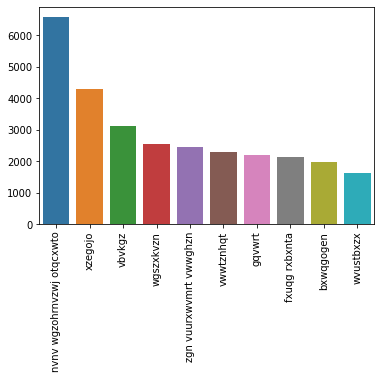

In [27]:
fig = plt.figure(figsize = (6, 4))

sns.barplot(x = data['company_hash'].value_counts().head(10).index,
            y = data['company_hash'].value_counts().head(10).values.tolist())
plt.xticks(rotation = 90)
plt.show()

<font color = 'blue'> <b> Insights </b> </font>
* From the above count plot, we can see that highest people are working in the company with the name **nvnv wgzohrnvzwj otqcxwto** with around 8324 entries.



In [28]:
data['email_hash'].value_counts().head(10)

3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378    9
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c    9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee    8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183    8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c    8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66    7
f5279f186abfb98a09d85a4467b99863c0bfc91c1147e542d6d23a6a69c9a7be    7
5dcd62ab1a606642f3dde6f536f5a343a8e943f215c463f945dd1bad9bff1531    7
caf66f38a8e742b7690dceb5b02d81ad8be684cfb6dd29b639a385b83748110b    7
Name: email_hash, dtype: int64

<font color = 'blue'> <b> Insights </b> </font>

* We can see that learner from email 3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378, bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b, 6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c has highest interaction / entries with us.

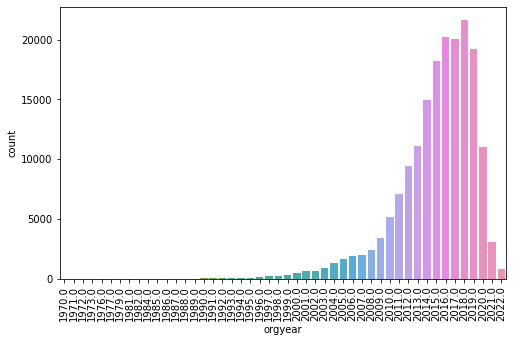

In [29]:
fig = plt.figure(figsize = (8, 5))

sns.countplot(data['orgyear'])
plt.xticks(rotation = 90)
plt.show()

<font color = 'blue'> <b> Insights </b> </font>
* From above countplot, We can see that nost of the learners joined the course in the scaler organization in the year 2018.


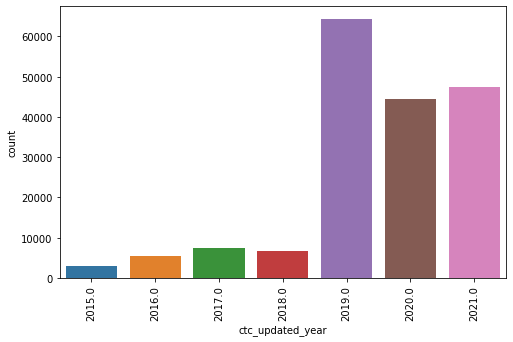

In [30]:
fig = plt.figure(figsize = (8, 5))

sns.countplot(data['ctc_updated_year'])
plt.xticks(rotation = 90)
plt.show()

<font color = 'blue'> <b> Insights </b> </font>
* From this graph, We can see that most people's ctc_updated is in year 2019. For year 2020 it is less possibly due to Covid-19 as most of the company gives appraisal in the month of april which was a month of lockdown in 2020.

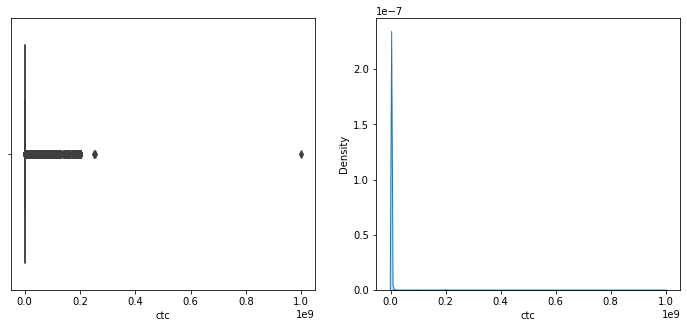

In [31]:
fig = plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data['ctc'])

plt.subplot(1, 2, 2)
sns.kdeplot(data['ctc'], fill = True)
plt.show()

<font color = 'blue'> <b> Insights </b> </font>
* From the ctc column we can see that there are outliers present in data.
* From the kdeplot we can see that it is not exactly Normal distribution.
* Now, we will apply IQR method to remove outliers.

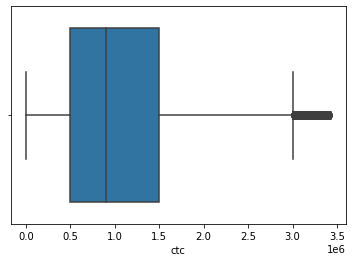

In [32]:
q1 = np.quantile(data['ctc'], 0.25)
q3 = np.quantile(data['ctc'], 0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

data = data[(data['ctc'] >= lower_bound) & (data['ctc'] <= upper_bound)]

sns.boxplot(data['ctc'])
plt.show()

<font color = 'blue'> <b> Insights </b> </font>

* We can see that after removing outliers from ctc we are getting good data but still some outliers are present. 
* These outliers are not much far they are workable so we will try to continue working with them as if we try to remove them we will be left with very less data.

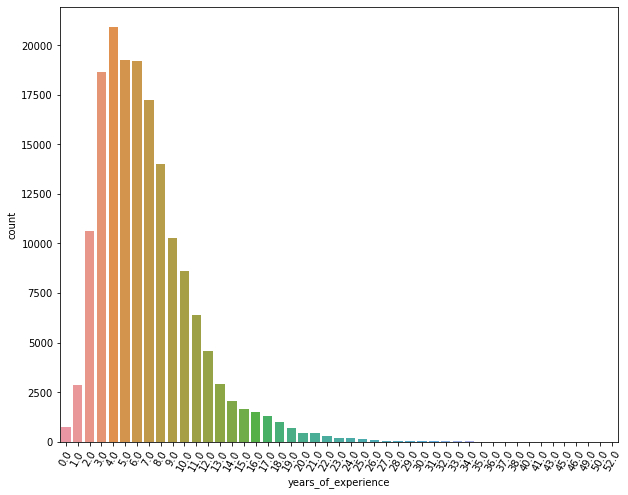

In [33]:
fig = plt.figure(figsize = (10, 8))

sns.countplot(data['years_of_experience'])
plt.xticks(rotation = 60)
plt.show()

<font color = 'blue'> <b> Insights </b> </font>

* From above countplot we can say that most people have experience of 4 years (i.e. they joined company in 2018).

<font color = 'Red'> <b> Bivariate Analysis </b> </font>

In [34]:
groupbyData = data.groupby(['company_hash', 'years_of_experience']).mean().ctc.reset_index()
groupbyData.head()

,company_hash,years_of_experience,ctc
0,0,2.00,100000.00
1,0000,5.00,300000.00
2,01 ojztqsj,6.00,270000.00
3,01 ojztqsj,11.00,830000.00
4,05mz exzytvrny uqxcvnt rxbxnta,3.00,1100000.00


Now, first we will create flag for designation where if person having ctc more than average ctc of his company with same years of experience then we will categorize him as 1, if ctc is equal to mean then 2 else we will put him in tier 3.

In [35]:
data['designationFlag'] = 1

for row in tqdm_notebook(range(data.shape[0])):
    _companyHash = data['company_hash'].iloc[row]
    _jobPosition = data['job_position_new'].iloc[row]
    _yearsofexperience = data['years_of_experience'].iloc[row]
    _ctc = data['ctc'].iloc[row]
    _gdata = groupbyData[(groupbyData['company_hash'] == _companyHash) & (groupbyData['years_of_experience'] == _yearsofexperience)]
    
    if _ctc > _gdata['ctc'].iloc[0]:
        data['designationFlag'].iloc[row] = 3
    
    elif _ctc == _gdata['ctc'].iloc[0]:
        data['designationFlag'].iloc[row] = 2

  0%|          | 0/166397 [00:00<?, ?it/s]

Secondly, we will find average ctc of learner based on their company and job_position. Any individual earning more than the average ctc must be having high level of experience or their class is 1 (they are elite learners), anyone earning equal to mean is of class 2 and rest is class 3.

In [36]:
groupbyData = data.groupby(['company_hash', 'job_position_new']).mean().ctc.reset_index()
groupbyData.head()

,company_hash,job_position_new,ctc
0,0,4297006.39,100000.00
1,0000,2938334.27,300000.00
2,01 ojztqsj,1734761.95,550000.00
3,05mz exzytvrny uqxcvnt rxbxnta,3969126.34,1100000.00
4,1,1879330.82,100000.00


In [37]:
data['classFlag'] = 1

for row in tqdm_notebook(range(data.shape[0])):
    _companyHash = data['company_hash'].iloc[row]
    _jobPosition = data['job_position_new'].iloc[row]
    _yearsofexperience = data['years_of_experience'].iloc[row]
    _ctc = data['ctc'].iloc[row]
    _gdata = groupbyData[(groupbyData['company_hash'] == _companyHash) & (groupbyData['job_position_new'] == _jobPosition)]
    
    if _ctc > _gdata['ctc'].iloc[0]:
        data['classFlag'].iloc[row] = 3
    
    elif _ctc == _gdata['ctc'].iloc[0]:
        data['classFlag'].iloc[row] = 2

  0%|          | 0/166397 [00:00<?, ?it/s]

At last, we will find average ctc company_wise. We will use this to find learners who are of same company but are earning more than average (to be called as tier 1), equal to average (tier 2) and less than average (tier 3).

Mostly people earning more than average in a company are people at high post or with good years of experience or probably both.

In [38]:
groupbyData = data.groupby(['company_hash']).mean().ctc.reset_index()
groupbyData.head()

,company_hash,ctc
0,0,100000.00
1,0000,300000.00
2,01 ojztqsj,550000.00
3,05mz exzytvrny uqxcvnt rxbxnta,1100000.00
4,1,175000.00


In [39]:
data['tierFlag'] = 1

for row in tqdm_notebook(range(data.shape[0])):
    _companyHash = data['company_hash'].iloc[row]
    _ctc = data['ctc'].iloc[row]
    _gdata = groupbyData[(groupbyData['company_hash'] == _companyHash)]
    
    if _ctc > _gdata['ctc'].iloc[0]:
        data['tierFlag'].iloc[row] = 3
    
    elif _ctc == _gdata['ctc'].iloc[0]:
        data['tierFlag'].iloc[row] = 2

  0%|          | 0/166397 [00:00<?, ?it/s]

In [40]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_new,email_hash_new,job_position_new,years_of_experience,designationFlag,classFlag,tierFlag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00,1116049.23,1411019.66,3469012.73,6.00,2,2,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00,2197333.62,935830.86,1734761.95,4.00,1,1,1
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.00,2000000,Backend Engineer,2020.00,2256458.77,1904484.21,1879330.82,7.00,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.00,700000,Backend Engineer,2019.00,1713928.57,2256458.77,1879330.82,5.00,1,1,1
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.00,1400000,FullStack Engineer,2019.00,948810.86,1630337.24,1734761.95,5.00,2,2,3


Now, since we have created 3 different flags now data analysis would be much easier

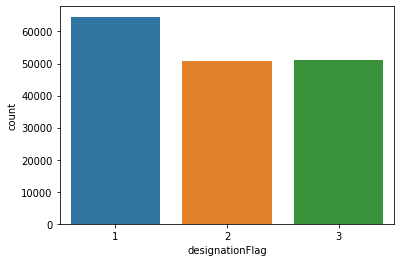

In [41]:
sns.countplot(data['designationFlag'])
plt.show()

<font color = 'blue'> <b> Insights </b> </font>

* We can say that people who are freshers are more our learners.

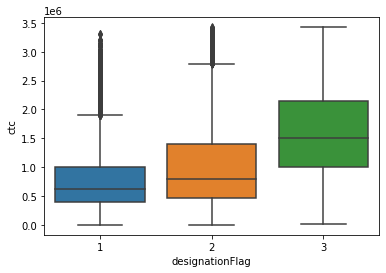

In [42]:
sns.boxplot(x = data['designationFlag'],
            y = data['ctc'])

plt.show()

<font color = 'blue'> <b> Insights </b> </font>
* The above graph shows that most people who are of tier 3 are earning on an average 15 Lacs per annum.


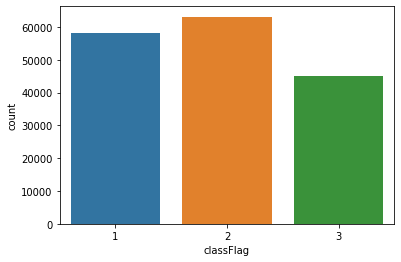

In [43]:
sns.countplot(data['classFlag'])
plt.show()

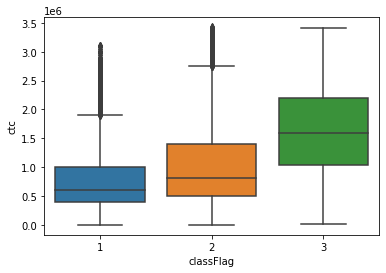

In [44]:
sns.boxplot(x = data['classFlag'],
            y = data['ctc'])

plt.show()

<font color = 'blue'> <b> Insights </b> </font>

* From above plot we can say that people who are having high level of experience are earning around 15 Lacs.

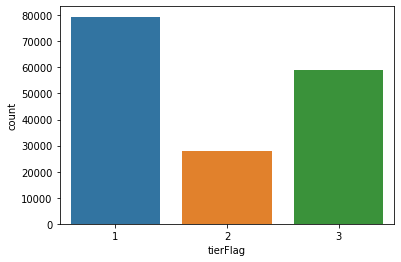

In [45]:
sns.countplot(data['tierFlag'])
plt.show()

<font color = 'Red'> <b> Manual Clustering </b> </font>

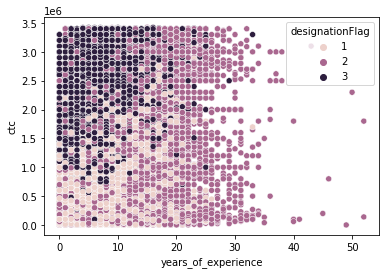

In [46]:
sns.scatterplot(x = data['years_of_experience'],
                y = data['ctc'],
                hue = data['designationFlag'])

plt.show()

<font color = 'blue'> <b> Insights </b> </font>
* On clustering based on years_of_experience and ctc along with designationFlag we clearly see no pattern to differentiate learns based on these attributes

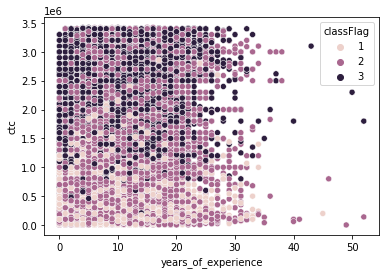

In [47]:
sns.scatterplot(x = data['years_of_experience'],
                y = data['ctc'],
                hue = data['classFlag'])

plt.show()

<font color = 'blue'> <b> Insights </b></font>
* On clustering based on years_of_experience and ctc along with classFlag we clearly see no pattern to differentiate learns based on these attributes

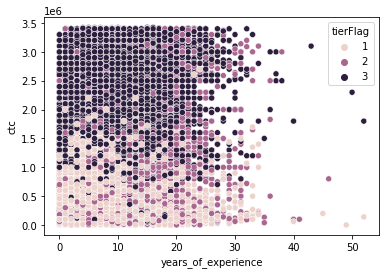

In [48]:
sns.scatterplot(x = data['years_of_experience'],
                y = data['ctc'],
                hue = data['tierFlag'])

plt.show()

<font color = 'blue'> <b> Insights </b> </font>
* On clustering based on years_of_experience and ctc along with tierFlag we clearly see no pattern to differentiate learns based on these attributes

* Also, we can use the tier column to find top earning 10 employees in each company and least earning 10 employees in a company

In [49]:
companyDataTier1 = data[data['tierFlag'] == 1]

counter = 0
for company in companyDataTier1['company_hash'].unique():
    if counter == 5:
        break
    _data = companyDataTier1[companyDataTier1['company_hash'] == company]
    print(f"For company {company} the employees earning more than most of the employees in the company are : ")
    print(_data.sort_values('ctc', ascending = False).head(10)['email_hash'].values.tolist())
    print()
    counter += 1

For company atrgxnnt xzaxv the employees earning more than most of the employees in the company are : 
['6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af', '696f674fbc0d337b20152f91c43082bafaa243da70932c1c543fa3a0e028c63e', 'b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef5dda4239da293f3b5c', 'dc8d39f3e9dd9f7576194e1a13c233bfe704bf9a72df994afc99dcfd2e6e14ff', '0d2f25432591093f5907a8681d600f869bbe7c2ae39cd715b06f76c9c192e7da', 'a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475fad6ba28476f9f98cb']

For company qtrxvzwt xzegwgbb rxbxnta the employees earning more than most of the employees in the company are : 
['3fde2d8b375672193f1a7a7785ba20d0f47f019f01f104fd6ca9018357665f0a', '53a590c1753474523188b1a2ef2d6480deb24402975d2de43e4fea06f5316139', '931fe7fe5c8b8eeeb5bb528be3c85c196ffcd908da8dbb00d21b9af607754467', '1584b73e38d5e09aa0c1bb03cab49b6720e6688e3dd5abdc7e2ac7e077a98378', 'e73f45f8a717ffd07c6d200899f8dfef329dba2b440d0a6b4cbf938140e134f8', '83bb19f3e15a46c6a6e415f781c5279

<font color = 'blue'> <b> Insights </b> </font>
* I am printing 5 values otherwise notebook would be filled with data only.

In [50]:
companyDataTier3 = data[data['tierFlag'] == 3]
counter = 0

for company in companyDataTier3['company_hash'].unique():
    if counter == 5:
        break
    _data = companyDataTier3[companyDataTier3['company_hash'] == company]
    print(f"For company {company} the employees earning less than most of the employees in the company are : ")
    print(_data.sort_values('ctc', ascending = True).head(10)['email_hash'].values.tolist())
    print()
    counter += 1

For company qxen sqghu the employees earning less than most of the employees in the company are : 
['e6092124b321c70026b718ea529608c617a14da56aa74257fb37be36c4eae9cb', '6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095', '6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095']

For company ngdor ntwy the employees earning less than most of the employees in the company are : 
['72c2171a022115d475c8faac306912a4c95f6dd7fdd320df09a5e9160d2a8385']

For company bgsrxd the employees earning less than most of the employees in the company are : 
['fa0b67b15157293101da4d1b1d43084f50c92fdbcfa41cf32c7a6fa5658472e6', 'e0425a113b0354dcfbbd502bc274faaa54a25553e513fd6ea049d807e0b834b2', '5342d3161be69b05b3226ed4f71171538b5691b68f69e484a0cb2c1514e32d32', '5342d3161be69b05b3226ed4f71171538b5691b68f69e484a0cb2c1514e32d32', 'b9c924789a730dca889426b8d849afa84e164420925d3fabfef4b1a242b8b933', '43c449d172e747c5fd1fdc1a2440d74cd059be8bfe523b1aed207a8b7475dc8a', '88171bba1d58c8253f83a

<font color = 'blue'> <b> Insights </b> </font>
* I am printing only 5 values otherwise notebook would be filled with data only.
* We can find top 10 companies based on average CTC

In [51]:
data.groupby('company_hash').mean()[['ctc']].sort_values('ctc', ascending = False).head(10)

,ctc
company_hash,
mvqwrvjo ntwyzgrgsj wtzntq,3420000.00
st xzahonqxvr,3410000.00
ygntrgsxd,3400000.00
pqgzgo ojontbo,3400000.00
wgatzvnxgz xzzgcvnxgz rvmowzxr,3400000.00
vxavoy,3400000.00
mzjbtrrgz ntwyzgrgsxto,3400000.00
vagzbg uqxcvnt rxbxnta,3400000.00
qtte ntwyzgrgsxto,3400000.00


<font color = 'blue'> <b> Insights </b> </font>
* We can say that above are top 10 companies having mean CTC greater than others

In [52]:
pd.DataFrame(data.groupby(['company_hash', 'job_position'])['ctc'].apply(lambda grp: grp.nlargest(2).sum()))

ctc
company_hash                   job_position               
0                              Other                100000
0000                           Other                300000
01 ojztqsj                     Android Engineer     270000
                               Frontend Engineer    830000
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer    1100000
...                                                    ...
zyuw rxbxnta                   Frontend Engineer   2400000
zyvzwt wgzohrnxzs tzsxzttqo    Frontend Engineer    940000
zz                             Other               1370000
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer   600000
zzzbzb                         Other                720000

[56638 rows x 1 columns]

<font color = 'blue'> <b> Insights </b> </font>

* Using above result, we can see that mostly see that tech positions are the good paying jobs in each company so we should offer same to each learner to maximise profits.

<font color = 'red'> <b> K means clustering </b> </font>
* Now, we have applied manual clustering and we do not see any good differentiation as we are not combining features together.
* So, we will use unsupervised machine learning called K means clustering

First, we will choose our features from original dataframe

In [53]:
data.head(2)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_new,email_hash_new,job_position_new,years_of_experience,designationFlag,classFlag,tierFlag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00,1116049.23,1411019.66,3469012.73,6.00,2,2,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00,2197333.62,935830.86,1734761.95,4.00,1,1,1


In [54]:
X = data[['orgyear', 'ctc',  'ctc_updated_year', 'company_hash_new', 'email_hash_new',
          'job_position_new', 'years_of_experience', 'designationFlag', 'classFlag', 'tierFlag']]

In [55]:
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X)

<font color = 'blue'> <b> Insights </b> </font>
* For initally we are choosing number of clusters as 3

In [56]:
k = 3
kmeans = KMeans(n_clusters = k, init = "random", n_init = 2)
y_pred = kmeans.fit_predict(X_train)

clusters = pd.DataFrame(X_train, columns = X.columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,orgyear,ctc,ctc_updated_year,company_hash_new,email_hash_new,job_position_new,years_of_experience,designationFlag,classFlag,tierFlag,label
0,0.19,-0.00,0.37,-0.48,-0.56,1.54,-0.19,0.10,0.10,-0.97,0
1,0.69,-0.86,-0.38,0.07,-1.08,-0.58,-0.69,-1.11,-1.17,-0.97,0
2,-0.06,1.19,0.37,0.10,-0.02,-0.40,0.06,0.10,0.10,0.14,1


In [57]:
clusters['label'].value_counts()

0    91603
1    45842
2    28952
Name: label, dtype: int64

In [58]:
clusters['label'].value_counts()

0    91603
1    45842
2    28952
Name: label, dtype: int64

<font color = 'blue'> <b> Insights </b> </font>
* From above data we can see that mostly learners are categorized into cluster 1 (while least are into 0 and 2).
* Let us try to plot them to see if they are correct or not

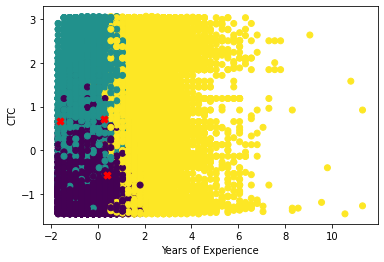

In [59]:
plt.scatter(clusters['years_of_experience'], clusters['ctc'], c = clusters['label'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  color = "red",
            marker = "X", s = 50)
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()

In [60]:
data['years_of_experience'].max()

52.0

<font color = 'blue'> <b> Insights </b> </font>

* From above figure we can clearly see that there are 3 clusters which are self explanatory as learners with high years of experience and high CTC are one cluster (people with high pay and good experience probably mangerial position people) whereas people who are having more CTC and less experience (maybe directors, CEOs, freshers in elite companies) are another cluster and people with less CTC and less expereience (freshers from 2nd or 3rd year) are third cluster.

* Hence, we can come up with marketing strategies for learning belonging to respective cluster to ramp up our sales

Also, we don't know how many clusters to keep so we will use Elbow method for this.

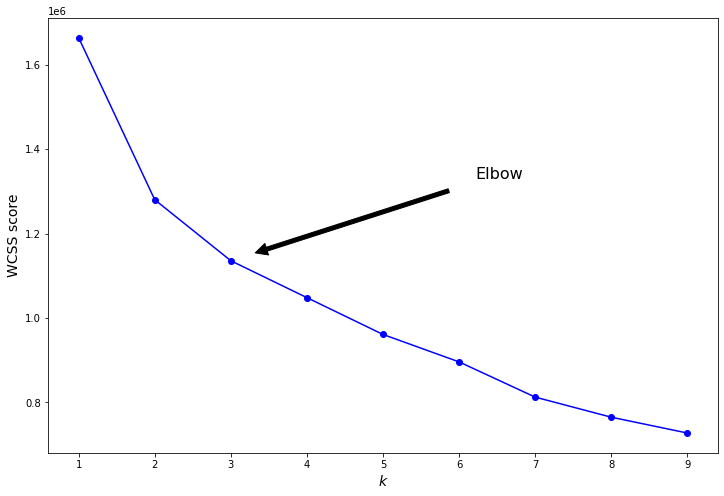

In [61]:
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X_train) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("WCSS score", fontsize=14)
plt.annotate('Elbow',
             xy = (3, inertias[2]),
             xytext = (0.55, 0.55),
             textcoords = 'figure fraction',
             fontsize = 16,
             arrowprops = dict(facecolor='black', shrink=0.1)
            )
plt.show()

<font color = 'blue'> <b> Insights </b> </font>

* From above elbow plot we can see that 3 are the optimum number of clusters and which proves are hypothesis that we are having three cluster learners

* High pay, high years of experience (managerial level people with good experience, who are looking for upskillment or to go at even higher scale)
* High pay, less experience (people placed at good MAANG or FAANG companies, who might be looking for upskillment or are lacking industry skills)
* Less pay, less experience (our target audience, as they want hike and knowledge so they want scaler courses)

<font color = 'red'> <b>Hierarchial Clustering</b></font>

Since, K means clustering is the best option to get inference and can also be used in production for a new learning coming in.

But for pure analysis purpose hierarchial clustering is also used.

Since, our data is too large hence we will try to use sample of data. Due to my configuration I am using 20% fraction of the original data with replacement technique.

In [62]:
sampleData = X.sample(frac = 0.15, 
                      replace = True, 
                      random_state = 1)
scaler = StandardScaler()
sampleDataScaled = scaler.fit_transform(sampleData)

In [63]:
hierarchialClustering = AgglomerativeClustering(n_clusters = 3, 
                                                affinity = 'euclidean', 
                                                linkage = 'ward')

y_pred = hierarchialClustering.fit_predict(sampleDataScaled)

clusters = pd.DataFrame(sampleDataScaled, columns = X.columns)
clusters['hier_labels'] = y_pred

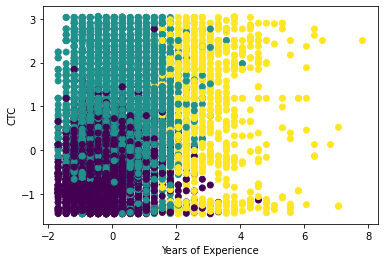

In [64]:
plt.scatter(clusters['years_of_experience'], clusters['ctc'], c = clusters['hier_labels'])
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()

<font color = 'blue'> <b> Insights </b> </font>

* From hierarchial clustering we can see that there are still 3 clusters and thus it proves that K means was also doing same thing with data

<font color = 'red'><b>Agglomerative Clustering**</b></font>

In [65]:
sampleData = X.sample(frac = 0.15, 
                      replace = True, 
                      random_state = 1)
scaler = StandardScaler()
sampleDataScaled = scaler.fit_transform(sampleData)

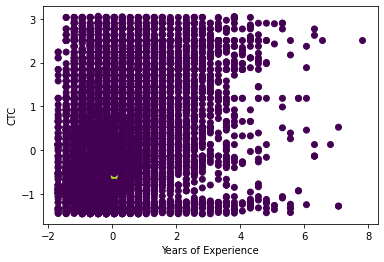

In [66]:
dbsc = DBSCAN(eps = 0.3, min_samples = 4).fit(sampleData)
dbscan_labels = dbsc.labels_

clusters = pd.DataFrame(sampleDataScaled, columns = X.columns)
clusters['dbscan_labels'] = dbscan_labels

plt.scatter(clusters['years_of_experience'], clusters['ctc'], c = clusters['dbscan_labels'])
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()

Here, DBSCAN performed worst and thus we can still rely on K means and agglomerative result for categorising learners.


<font color = 'blue'> <b> Insights </b> </font> 

* Using results of K means we can say that there are broadly 3 categories of learners

* High years of experience and high pay (mostly managerial level)
* High pay and less experience (placed in good companies like google , facebook)
* Less pay and less experience (our target as they want upskillment and good hike)

<font color = 'blue'> <b> Recommendations </b> </font>

* Since, learners from nvnv wgzohrnvzwj otqcxwto company are highest then we can launch some ads or discount or collaborate with company to attract more learners as most of them might be working in tech stack so they are the right audience to attract.


* When any new learner is coming to our masterclasses and has orgyear as 2018 then we should spend more energy over him as he is likely that he will buy our course.


* Also, we can collaborate with companies to ask employees who specifically joined them in year 2017 - 19 to take our course for their development.


* From above plot we can say that people who are at high post / designation in a company are having high CTC which is around 15 Lacs.


* Hence, scaler should target people who are at good positions for their courses.


* We can say that people who are not freshman and not high experienced can be targetted by scaler because they want to become financially stable and the only way is to get a good hike and it is only possible by their upskillment.


* We can say that in same company very few people are earning less than average which means that they are new joining or less years of experience. Hence, we should target more employees of those companies who are at same pace because they are most likely to earn more or upskill themselves


* Hence, one way of clustering users can be based on their designation, company and years_of_experience .


* People who are earning more than average in their company or who are working in good companies like tier 1 companies (google, facebook, amazon etc.) or are working in tech stack (like data science, full stack development technology) are the people whom we should approach and any new learner who lie in these cluster can be advertised as he can purchase our courses.